In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

import warnings # this is optional
warnings.filterwarnings('ignore')

**Matplotlib** offers extensive customization but demands more code, **Seaborn** simplifies statistical plots with built-in themes, and **Plotly** excels at creating dynamic and interactive visualizations.

If you prefer precise control over plot aesthetics and are comfortable writing code, **Matplotlib** might be your choice. If you’re aiming for informative statistical plots with less effort, **Seaborn** could be the go-to. For interactive dashboards and web applications that engage users, **Plotly** offers a powerful solution.

At first we should download the data

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

And now we can take a look at it

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


We need to know **the size** of the DataFrame

In [11]:
df.shape # Ok, we have 1000 clever (or almsot clever) students 

(1000, 8)

Now we need some basic information so we could go deeper

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Missing values
It looks like we don't have any missing values  
Is it true?  
Let's explore it

In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**No missing values**, I guess we're lucky

Now we can proceed with our investigation  
Let's explore our variables in details

In [13]:
df.gender.value_counts() # How many males and females we have

gender
female    518
male      482
Name: count, dtype: int64

We can even visualize it (at first simply)

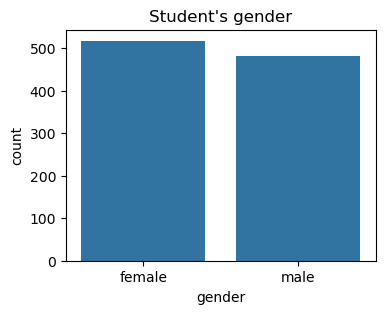

In [136]:
plt.figure(figsize = (4, 3))
sns.countplot(data = df, x = 'gender')
sns.countplot()
plt.title("Student's gender")
plt.show()

That's more like it<br>The classes are almost equal

#### Unique values
Let's analyse the next columns  
How many **unique values we have**, for example

In [42]:
print(df['race/ethnicity'].unique())
print()
print('As we can see, we have {} unique values'.format(df['race/ethnicity'].nunique()))

['group B' 'group C' 'group A' 'group D' 'group E']

As we can see, we have 5 unique values


What about the other columns?

In [43]:
print(df['parental level of education'].unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [44]:
print(df['lunch'].unique())

['standard' 'free/reduced']


*Have you ever wondered* if we can get the number of unique values of each column?

##### the Number of Unique Values of Each Column

In [132]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

And now we see everything we've seen above

#### Check for Duplicates
We should use *duplicated* function
<br>**df.duplicated(** *subset*, *keep* = first **))**

1. Subset - column label or sequence of labels (it can be DataFrame or Series)
2. keep = {‘first’, ‘last’, False}
   * first - marks duplicates as True **except for** the first occurrence.
   * False - all duplicates become True
   * last - Mark duplicates as True except for the last occurrence.

In [196]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [197]:
df.duplicated().sum()

0

As we see there are **no duplicated values** in the data set

### Visualization

Why don't we create two graphs and just combine them?

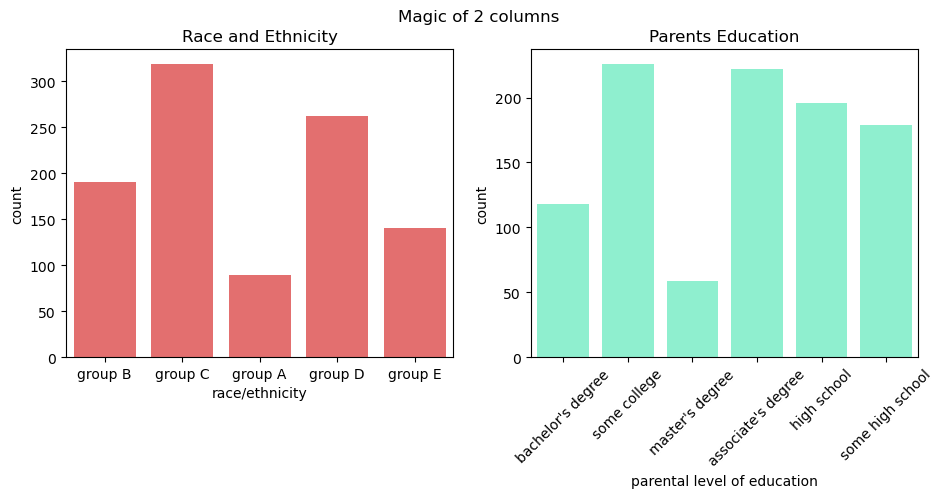

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))
fig.suptitle('Magic of 2 columns')
sns.countplot(data = df, 
              x = 'race/ethnicity',
              ax = axes[0],
              color='#F65C5C')
axes[0].set_title('Race and Ethnicity')

sns.countplot(data = df,
              x = 'parental level of education',
              ax = axes[1],
              color = 'aquamarine')
axes[1].set_title('Parents Education')
plt.xticks(rotation = 45)
plt.show()

### Let's use more **"complex visualization"**, shall we?)

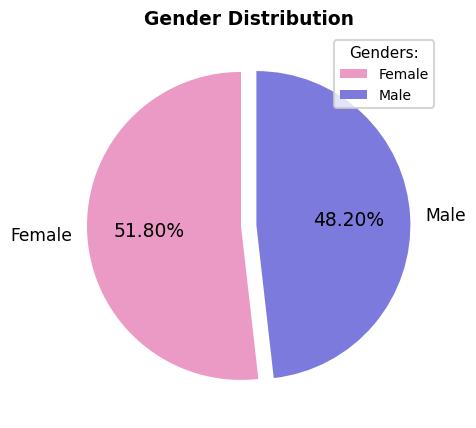

In [225]:
plt.figure(figsize=(12, 5))

plt.pie(df.gender.value_counts(), 
        labels = ['Female', 'Male'], 
        explode= [0.05, 0.05], 
        startangle = 90, 
        colors = ['#EB9AC5', '#7D7ADE'], 
        autopct = '%.2f%%')

legend = plt.legend(title = "Genders:",
           loc = 'upper right',
           fontsize="10")
legend.get_title().set_fontsize(11)
# leg = ax.legend()
# leg.set_title('A great legend',prop={'size':14}) just another way of doing this

plt.title('Gender Distribution', fontweight='bold')
plt.show() # to remove unnecessary description at the top of the graph

**Parameters**:
* *x* - must be always an arraylike (Series, np.Array)
* *explode* - allows you to the wedges to stand out, must be an array with one value for each wedge
* *labels* - adds labels to the pie chart (must be an array with one label for each wedge)
* *startangle* - the default start angle is at the x-axis (default angle is 0 in degrees)
* *colors* - sets the color of each wedge (must be an array with one value for each wedge)
* *autopct* - enables you to display the percent value using Python string formatting

plt.legend() - adds a list of explanation for each wedge
<br> Another way of changing the font size of a legend is by using the legend function's **prop = {}** parameter. The font properties of the legend. If None (default), the current matplotlib.rcParams will be used

plt.setp(obj, **kwargs) function is used to set the property on an object



Now we can see that out of the total number of students, **51.89%** are females while **48.20%** are males.

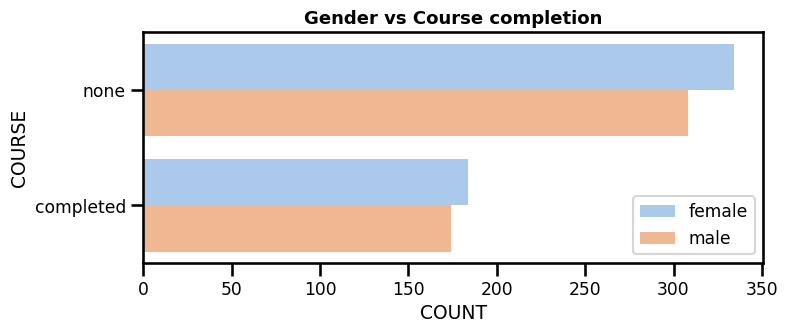

<Figure size 640x480 with 0 Axes>

In [226]:
plt.figure(figsize=(8,3))

ax = sns.countplot(y="test preparation course",
                   hue="gender",
                   data=df) # y = ... does the thing with rotation
ax.legend(loc='lower right',
          frameon=True)
plt.title('Gender vs Course completion',
          fontsize=13,
          fontweight='bold')
ax.set(xlabel='COUNT',ylabel='COURSE')
plt.show()
plt.clf()

In case we want to create an horizontal count plot we will need to *pass our data to the y argument*, instead of x
<br>We can also do this by using **sns.barplot(x = , y = , orient='h')**
<br>**frameon = True** - whether the legend should be drawn on a patch (frame)

The diffrence between these groups might be explained by the fact that there are more female students than male

## Feature Engineering

To analyse our data more thoroughly we're going to create two new variables: **total score** and **average score**

In [4]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = np.round(df['total score'] / 3, 2)

Let's see what we've got

In [5]:
df[['math score','reading score','writing score','total score','average score']].head()

,math score,reading score,writing score,total score,average score
0,72,72,74,218,72.67
1,69,90,88,247,82.33
2,90,95,93,278,92.67
3,47,57,44,148,49.33
4,76,78,75,229,76.33


We don't have any specific rules so we can make them
<br>Let's say anyone who got **less than 40 in math**, **writing** or **reading** - **failed**
<br>Anyone who's average score is **less than 60** also **failed**

In [6]:
# initializing the passscore
passscore = 40

In [7]:
def you_shall_not_pass(row):  # who gets it gets it)
    if row['math score'] < passscore or row['math score'] < passscore or row['math score'] < passscore or row['average score'] < 60:
        return 'failed'
    return 'passed'


#df.apply(lambda x: )
df['result'] = df.apply(you_shall_not_pass, axis = 1)

In [8]:
df.head() # Let's look what we've done

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score,result
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,passed
1,female,group C,some college,standard,completed,69,90,88,247,82.33,passed
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,passed
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33,failed
4,male,group C,some college,standard,none,76,78,75,229,76.33,passed


##### A little explanation of .apply()
It applies a function on each element in a pandas Series and each row or column in a pandas DataFrame
* If we are working with tabular data, we must specify an axis we want our function to act on (0 for columns; and 1 for rows, by default axis = 0)

## Check Statistics of the Dataset

In this section we're going to focus on **quantitative variables** but at first we should check our **new categorical variable**

In [38]:
df.result.value_counts(normalize = True)

result
passed    0.715
failed    0.285
Name: proportion, dtype: float64

As we see, almost **72%** of all students passed (exam)
<br>Maybe we should have made the passcore greater...

Firstly, we should know how many students got the highest marks

In [170]:
highest_math = df[df['math score'] == 100].shape[0]
highest_writing = df[df['writing score'] == 100].shape[0]
highest_reading = df[df['reading score'] == 100].shape[0]
total_number = df.shape[0]

print(f'Number of students with the highest marks in Maths: {highest_math} or {(highest_math / total_number) * 100:.1f}% of all students')
print(f'Number of students with the highest marks in Writing: {highest_writing} or {(highest_writing / total_number) * 100:.1f}% of all students')
print(f'Number of students with the highest marks in Reading: {highest_reading} or {(highest_reading / total_number) * 100:.1f}% of all students')
print()
print('Number of students with the highest marks in all subjects: {}, aka the Perfect Score'.format(df[df['total score'] == 300].shape[0]))

Number of students with the highest marks in Maths: 7 or 0.7% of all students
Number of students with the highest marks in Writing: 14 or 1.4% of all students
Number of students with the highest marks in Reading: 17 or 1.7% of all students

Number of students with the highest marks in all subjects: 3, aka the Perfect Score


Now we should get *more insights* about the data

In [171]:
df.describe()

,math score,reading score,writing score,total score,average score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770580
std,15.16308,14.600192,15.195657,42.771978,14.257311
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.330000
50%,66.00000,70.000000,69.000000,205.000000,68.330000
75%,77.00000,79.000000,79.000000,233.000000,77.670000
max,100.00000,100.000000,100.000000,300.000000,100.000000


* All means (math score, reading score, writing score) are very close to each other - between 66 and 68.05
* All standard deviations are also close - between 14.6 and 15.19

But when we checked means we should probably compare them to medians

In [214]:
print('Math Score: Median = {} vs Mean = {}'.format(np.median(df['math score']), np.mean(df['math score'])))
print('Writing Score: Median = {} vs Mean = {}'.format(np.median(df['writing score']), np.mean(df['writing score'])))
print('Reading Score: Median = {} vs Mean = {}'.format(np.median(df['reading score']), np.mean(df['reading score'])))

Math Score: Median = 66.0 vs Mean = 66.089
Writing Score: Median = 69.0 vs Mean = 68.054
Reading Score: Median = 70.0 vs Mean = 69.169


As we can see the medians are almost equal to the means and that might say something about **skewness**
<br>Let's visualize it later

There is another way to get insights (not only describe)

In [9]:
# Aberage score by genders
df.groupby('gender')['average score'].agg(['count', 'mean', 'median', 'std', 'max', 'min'])

,count,mean,median,std,max,min
gender,,,,,,
female,518,69.569498,70.33,14.541667,100.0,9.0
male,482,65.837303,66.33,13.698944,100.0,23.0


#### Distribution

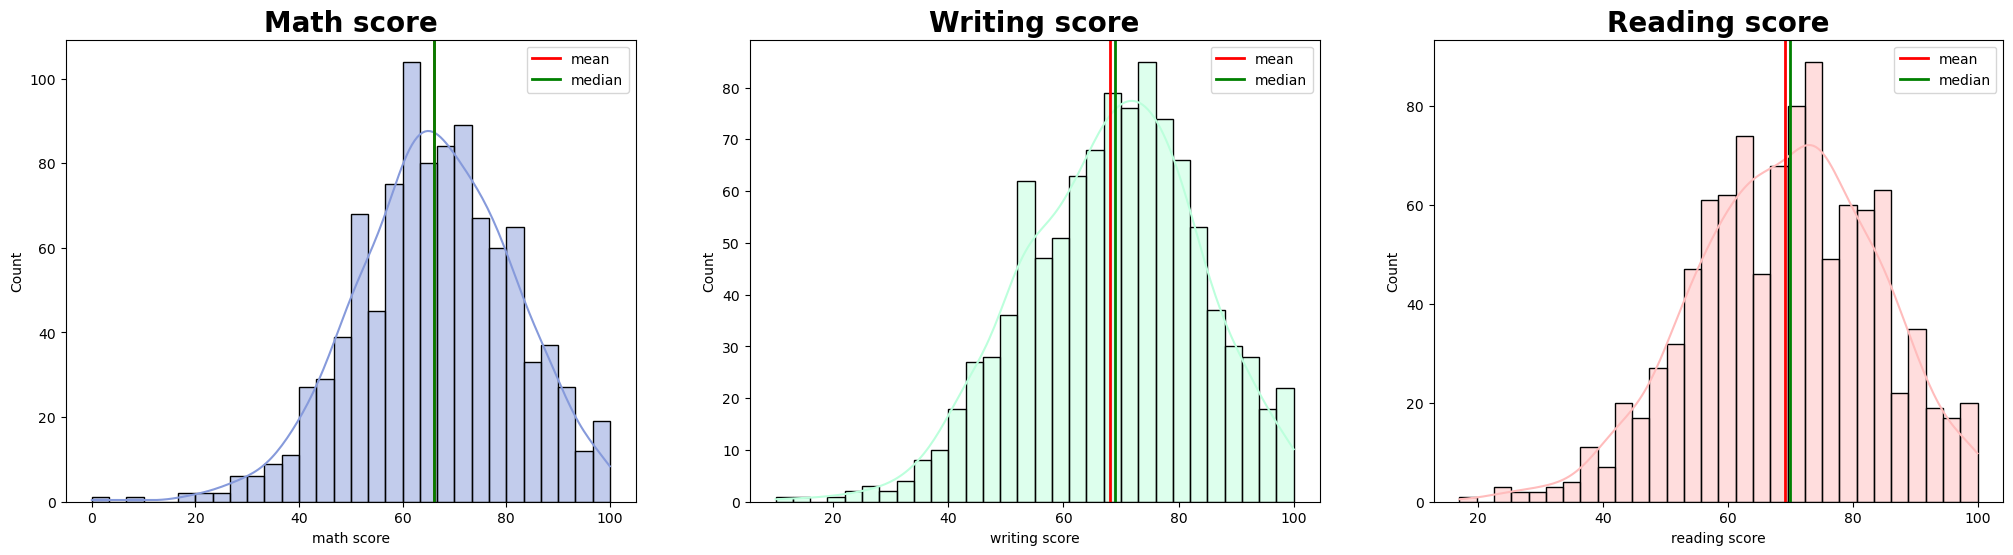

In [76]:
# At first we create a subplot with three histograms side by side
fig, axes = plt.subplots(1, 3, figsize=(25, 6))


# Plot the first histogram with KDE for the Math Score
sns.histplot(data = df,
             x = 'math score',
             bins = 30,
             kde = True,
             ax = axes[0],color = '#869ADB')
axes[0].set_title('Math score',
                  fontweight="bold",
                  size=20)
axes[0].axvline(np.mean(df['math score']), color='red', linewidth=2, label="mean")
axes[0].axvline(np.median(df['math score']), color='green', linewidth=2, label="median")
axes[0].legend()

# Plot the second histogram with KDE for the Writing Score
sns.histplot(data = df,
             x = 'writing score',
             bins = 30, kde = True,
             ax = axes[1],
             color = '#BCFFDC')
axes[1].set_title('Writing score', # Axes.set_title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
                  fontweight="bold",
                  size=20)
axes[1].axvline(np.mean(df['writing score']), color='red', linewidth=2, label="mean")
axes[1].axvline(np.median(df['writing score']), color='green', linewidth=2, label="median")
axes[1].legend()

# Plot the third histogram with KDE for the Reading Score
sns.histplot(data = df,
             x = 'reading score',
             bins = 30, kde = True,
             ax = axes[2],
             color = '#FFBCBC')
axes[2].set_title('Reading score',
                  fontweight="bold",
                  size = 20)
axes[2].axvline(np.mean(df['reading score']), color='red', linewidth=2, label="mean")
axes[2].axvline(np.median(df['reading score']), color='green', linewidth=2, label="median")
axes[2].legend()

plt.show()

plt.title(label, fontdict={'fontsize': , 'fontweight': ,'verticalalignment': }, loc = {'center', 'left', 'right'}, pad=None, **kwargs)

By looking at the histogramms we can certanly tell that these are **normally distributed** and as we've seen earlier means and meadians are almost equal so we can check skewness

#### Skewness
**Skewness** is a measure of the asymmetry of a distribution

In [23]:
print('Math Score:', df['math score'].skew())
print('Writing Score:', df['writing score'].skew())
print('Reading Score:', df['reading score'].skew())

Math Score: -0.27893514909431694
Writing Score: -0.28944397150761897
Reading Score: -0.25910451810923063


According to the "**Rule of thumb**":
1. If the skewness is between **-0.5 & 0.5**, the data are **nearly symmetrical**.
2. If the skewness is between **-1 & -0.5** (negative skewed) or between **0.5 & 1**(positive skewed), the data are **slightly skewed**.
3. If the skewness is **lower than -1** (negative skewed) or **greater than 1** (positive skewed), the data are **extremely skewed**.


And that just proves what we see (our data is nearly simmetrical)

### Outliers
**Outliers** are extreme values that lie outside the range of the rest of the data

There are at least three ways to find outliers and one of them is by using **box-plot with whiskers**
<br>This type of chart highlights minimum and maximum values (the range), the median, and the interquartile range for your data and **The interquartile range (IQR)**

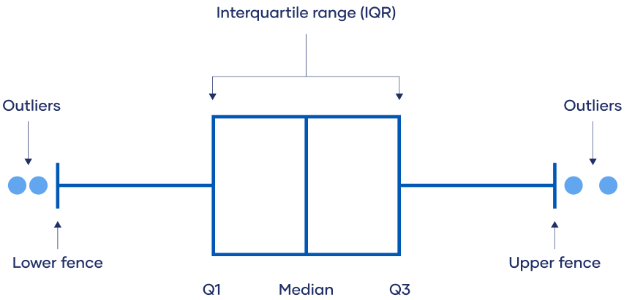

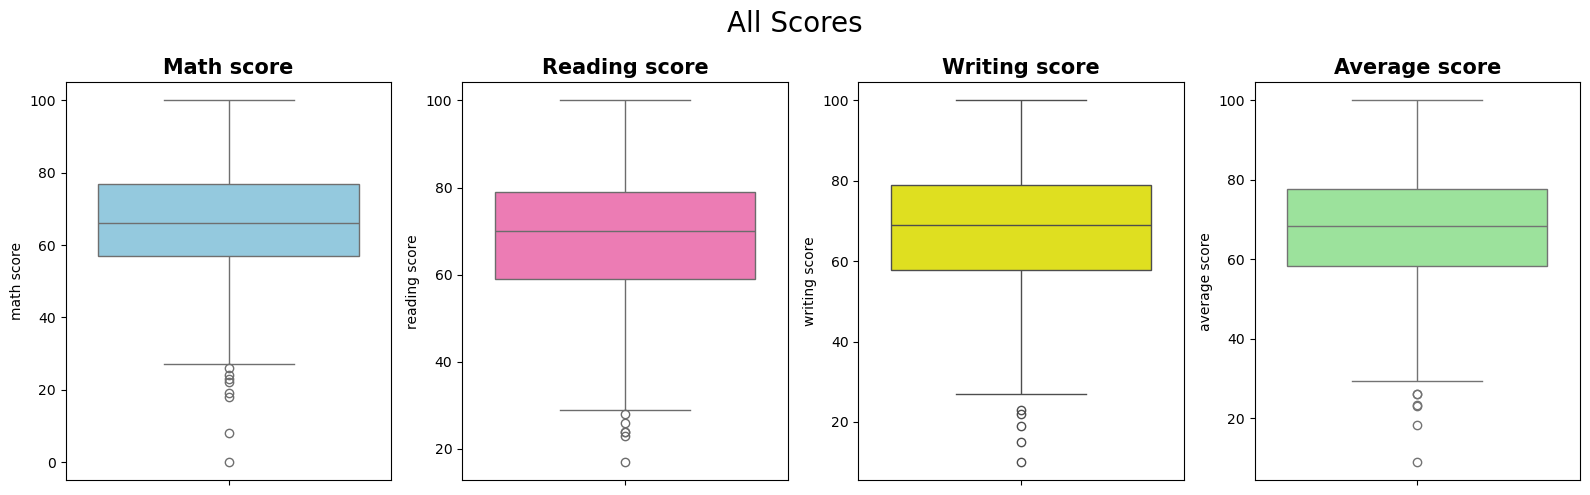

In [31]:
# Let's plot it
fig, axes = plt.subplots(1,4, figsize=(16,5))

fig.suptitle('All Scores', size = 20)

sns.boxplot(df['math score'],
            color='skyblue',
            ax = axes[0])
axes[0].set_title('Math score',
                  fontweight="bold",
                  size = 15)

sns.boxplot(df['reading score'],
            color='hotpink',
            ax = axes[1])
axes[1].set_title('Reading score',
                  fontweight="bold",
                  size = 15)

sns.boxplot(df['writing score'],
            color='yellow',
            ax = axes[2])
axes[2].set_title('Writing score',
                  fontweight="bold",
                  size = 15)

sns.boxplot(df['average score'],
            color='lightgreen',
            ax = axes[3])
axes[3].set_title('Average score',
                  fontweight="bold",
                  size = 15)


plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

We might actually be able to find an approximate number of ouliers
<br>According, to the formula:
<br>*Upper fence = Q3 + (1.5 * IQR)*
<br>*Lower fence = Q1 – (1.5 * IQR)*

In [52]:
# There are two ways how IQR can be calculated
print(stats.iqr(df['average score']))

# or 
q1, q2, q3 = np.quantile(df['average score'], [0.25, 0.5, 0.75])
print(q3 - q1)

# Let's check if this 
print('Q1 – (1.5 * IQR) =', q1 - 1.5 * stats.iqr(df['average score']))

19.340000000000003
19.340000000000003
Q1 – (1.5 * IQR) = 29.319999999999993


In [9]:
lst = ['math score', 'reading score', 'writing score', 'average score']

for i in lst:
    q1, q2, q3 = np.quantile(df[i], [0.25, 0.5, 0.75])
    iqr = stats.iqr(df[i])
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    if upper_bound >= 100:
        upper_bound = 100 # Because score can't be greater than 100
    n_outliers = df[df[i] < q1 - 1.5 * iqr].shape[0] # just another way of doing it
    print(i.title())
    print(f'Anything outside this range is an outlier: ({lower_bound}, {upper_bound})')
    print("Outliers: ",df[(df[i] < lower_bound) | (df[i] > upper_bound)][i].values)
    print('Number of outliers:', n_outliers)
    print()


Math Score
Anything outside this range is an outlier: (27.0, 100)
Outliers:  [18  0 22 24 26 19 23  8]
Number of outliers: 8

Reading Score
Anything outside this range is an outlier: (29.0, 100)
Outliers:  [17 26 28 23 24 24]
Number of outliers: 6

Writing Score
Anything outside this range is an outlier: (25.875, 100)
Outliers:  [10 22 19 15 23]
Number of outliers: 5

Average Score
Anything outside this range is an outlier: (29.319999999999993, 100)
Outliers:  [26.    9.   26.   23.33 23.   18.33]
Number of outliers: 6



## Multivariable Analysis

In this section we are going to analyse how two or more variables are related, using visualization and other methods

#### Contingency tables
A **contingency table** is a method of organizing data that has more than one variable to make it easier to understand.

In [40]:
# The main question: does the preparation course have an impact on the result?
pd.crosstab(df['result'], df['test preparation course'])

test preparation course,completed,none
result,,
failed,60,225
passed,298,417


That's an interestiong situation and we'll investigate it later...

In [42]:
# How are gender and test preparation course related?
pd.crosstab(df['gender'], df['test preparation course'])

test preparation course,completed,none
gender,,
female,184,334
male,174,308


The diffrence between these two groups can be explained by the fact that the number of females is greater than the number of males

In [40]:
# What about lunch?
pd.crosstab(df['gender'], df['lunch'])

lunch,free/reduced,standard
gender,,
female,189,329
male,166,316


It is also **inconclusive** so we'll check this later by uning hypothesis testing

#### Visualization

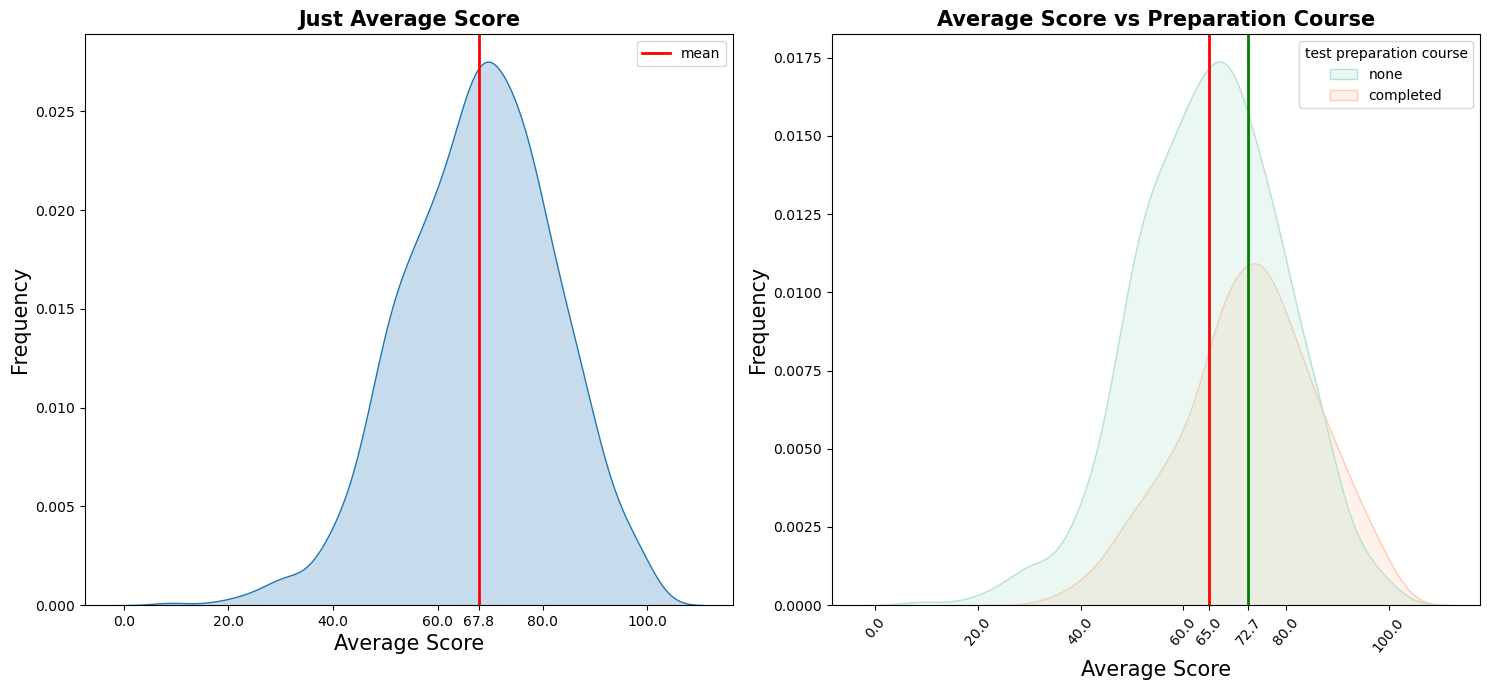

<Figure size 640x480 with 0 Axes>

In [36]:
# Let's start with Average score and Preparation course
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# We haven't used kdeplot yet, have we?
sns.kdeplot(data = df,
            x = 'average score',
            fill = True,
            ax = axes[0])
axes[0].set_title('Just Average Score',
                  fontweight="bold",
                  size=15)
axes[0].axvline(np.mean(df['average score']),
                color='red',
                linewidth=2,
                label="mean")
axes[0].set_xticks([0, 20, 40, 60, np.mean(df['average score']), 80, 100])
axes[0].set_xlabel('Average Score', size = 15)
axes[0].set_ylabel('Frequency', size = 15)
axes[0].legend()


sns.kdeplot(data = df,
            x = 'average score',
            hue ="test preparation course",
            fill = True,
            ax = axes[1],
            multiple = "layer",
            palette = 'Pastel2')
axes[1].set_title('Average Score vs Preparation Course',
                  fontweight="bold",
                  size=15)

# we calculate mean for students who did and didn't complete the course
completed_course_mean = np.round(np.mean(df[df['test preparation course'] == 'none']['average score']),1) 
none_course_mean = np.round(np.mean(df[df['test preparation course'] == 'completed']['average score']), 1)

# Now we're creating vertical lines indicating the means
axes[1].axvline(completed_course_mean,
                color='red',
                linewidth=2,
                label="none course mean")
axes[1].axvline(none_course_mean,
                color='green',
                linewidth=2,
                label="course completed mean")
axes[1].set_xlabel('Average Score', size = 15)
axes[1].set_ylabel('Frequency', size = 15)
axes[1].set_xticks([0, 20, 40, 60, none_course_mean,completed_course_mean, 80, 100]) # we add means to the graph
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 50)    # get_xticks returns np.array with all our xticks
plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()
plt.clf()

In [10]:
# There is another to represent the data
df.groupby('test preparation course')['average score'].agg(['count', 'mean', 'median', 'std', 'max', 'min'])

,count,mean,median,std,max,min
test preparation course,,,,,,
completed,358,72.669469,73.50,13.037129,100.0,34.33
none,642,65.038801,65.33,14.186568,100.0,9.00


Students who did preparation test tend to have better results (but most students did not take the course)
<br>It was quite obwious but we still had to check everything

##### Have you ever wondered how math score is related to writing score?
Why don't we just find out

<Figure size 800x300 with 0 Axes>

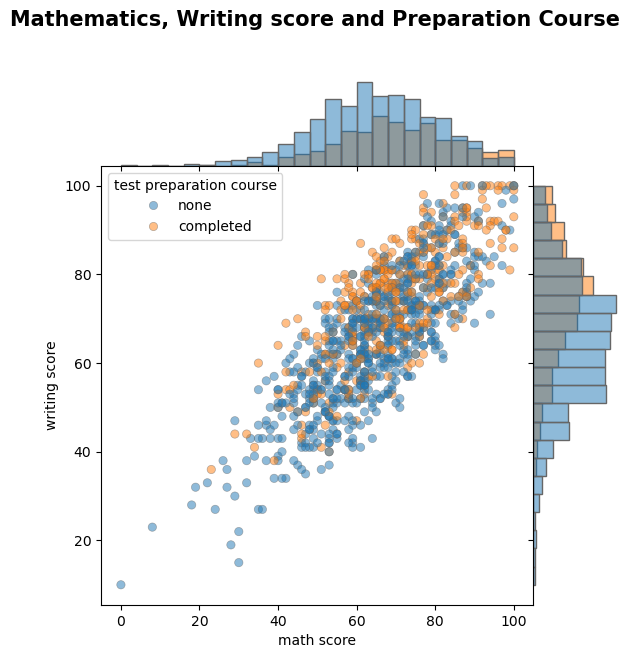

In [79]:
plt.figure(figsize=(8,3))

graph = sns.JointGrid(data = df, # sns.jointplot()
                      x = 'math score',
                      y = 'writing score',
                      hue = "test preparation course",
                      space = 0)
graph.plot(sns.scatterplot, sns.histplot, alpha=.5, edgecolor=".4")


plt.title('Mathematics, Writing score and Preparation Course',
          fontsize = 15,
          fontweight = 'bold',
          y = 1.3,
          loc = "right")

plt.show()

It looks like preparation course doesn't affect the the result but we'll check this later by using hypothesis testing

##### Summary Statistics

In [31]:
print('Math Score')
print('mean: ', df['math score'].mean())
print("variance: ", df['math score'].var())
print("standart deviation (std): ", df['math score'].std())
df[['math score', 'writing score']].describe().T

Math Score
mean:  66.089
variance:  229.91899799799847
standart deviation (std):  15.163080096009468


,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


##### Does parental education have any impact on student's performance?
To visualize and analyse we're going to use catplot

The Seaborn **catplot()** function is a figure-level function, rather than an axes-level function. This opens up different possibilities in terms of how you put together your visualizations. It provides a figure-level interface for creating categorical plots.

<Figure size 800x300 with 0 Axes>

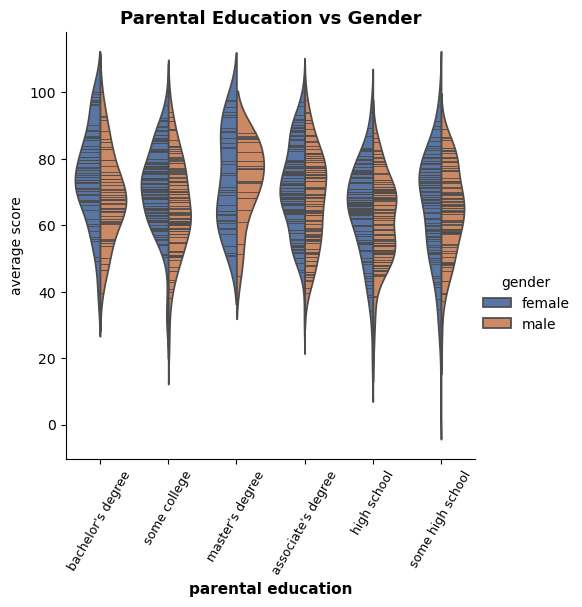

In [78]:
# catplot creates subplots
plt.figure(figsize=(8,3))

sns.catplot(data = df,
            x = "parental level of education",
            y = "average score",
            hue = "gender",
            kind = "violin",
            inner = "stick", # inner is an argument of a violin plot (representation of the data in the violin interior)
            split = True,
            palette = "deep")

plt.title('Parental Education vs Gender',
          fontsize=13,
          fontweight='bold')

plt.xlabel('parental education', size = 11, fontweight = 'bold')
plt.xticks(rotation=60, size = 9)
plt.show()

**Conclusion**:
<br>Acording to the graph, students (especially females) whose parents hold a Master's degree or Bachelor's degree tend to have higher score

##### Does Race/Ethnicity affect student's performance?

Now we'll add more complexity
<br>I hope you'll like that
##### Since all Distributions (Math, Reading, Writing) are close to normal we can make conclusions based on their means

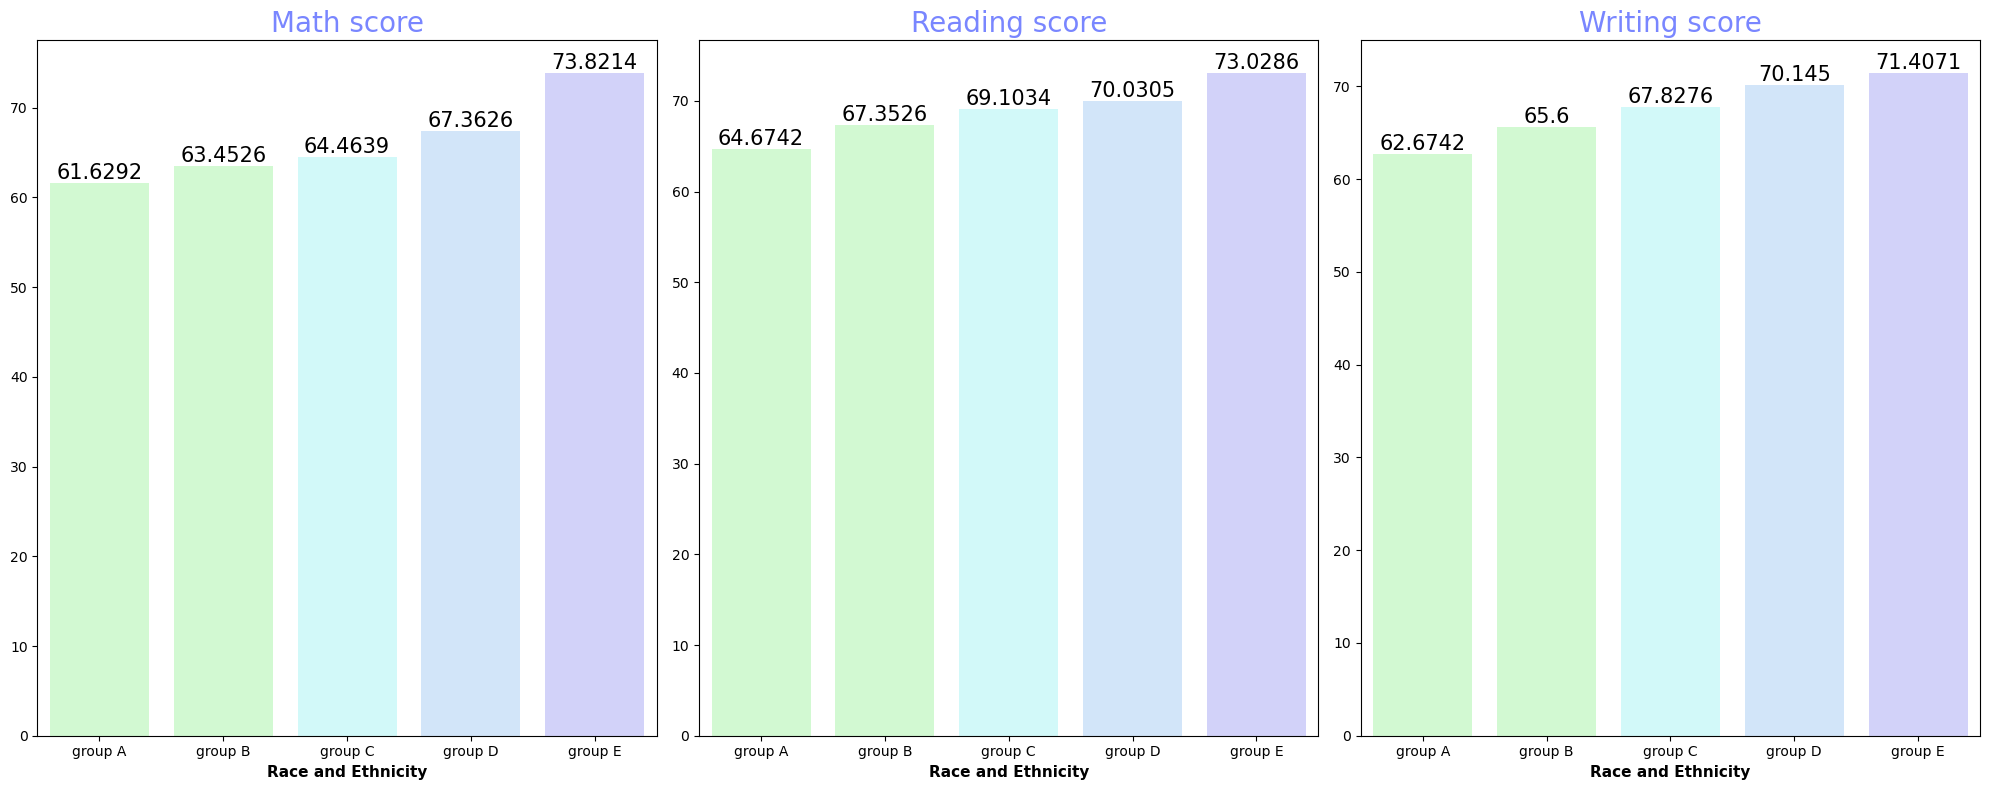

In [10]:
# To do more complex analysis we should group the data by race and ethnicity
grouped_data = df.groupby('race/ethnicity')

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# The bar plot for mean Math scores on the left
sns.barplot(x = grouped_data['math score'].mean().index,
            y = grouped_data['math score'].mean().values,
            palette = ["#CCFFCC", "#CCFFCC", "#CCFFFF", "#CCE5FF", "#CCCCFF"],
            ax = axes[0])
axes[0].set_title('Math score',
                  color='#7986FF',
                  size=20)
axes[0].set_xlabel('Race and Ethnicity',
                   size = 11,
                   fontweight = 'bold')
for container in axes[0].containers:
    axes[0].bar_label(container, color='black', size=15)


# The bar plot for mean Reading scores in the middle
sns.barplot(x = grouped_data['reading score'].mean().index,
            y = grouped_data['reading score'].mean().values,
            palette = ["#CCFFCC", "#CCFFCC", "#CCFFFF", "#CCE5FF", "#CCCCFF"],
            ax = axes[1])
axes[1].set_title('Reading score',
                  color='#7986FF',
                  size=20)
axes[1].set_xlabel('Race and Ethnicity',
                   size = 11,
                   fontweight = 'bold')
for container in axes[1].containers:
    axes[1].bar_label(container, color='black', size=15)


# The bar plot for mean Writing scores on the right
sns.barplot(x = grouped_data['writing score'].mean().index,
            y = grouped_data['writing score'].mean().values,
            palette = ["#CCFFCC", "#CCFFCC", "#CCFFFF", "#CCE5FF", "#CCCCFF"],
            ax = axes[2])
axes[2].set_title('Writing score',
                  color='#7986FF',
                  size=20)
axes[2].set_xlabel('Race and Ethnicity',
                   size = 11,
                   fontweight = 'bold')
for container in axes[2].containers:
    axes[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()

**Containers** are classes that collect semantically related Artists such as the bars of a bar plot
<br>**plt.bar_label**(container, labels=None, , fmt='%g', label_type='edge', padding=0, kwargs) adds labels to bars in the given BarContainer
* *label = None* if not given, the label texts will be the data values formatted with fmt

##### Conclusion:
* Students in the Group E have the highest marks
* By the contrast, students in the Group A have the lowest marks

In [41]:
# Just for clarity (what we did above)
print(grouped_data['math score'].mean().index)
print("Number of groups:", len(grouped_data['math score'].mean().index))
print()
print(grouped_data['math score'].mean().values)
print("Data data:", type(grouped_data['math score'].mean().values))

Index(['group A', 'group B', 'group C', 'group D', 'group E'], dtype='object', name='race/ethnicity')
Number of groups: 5

[61.62921348 63.45263158 64.46394984 67.36259542 73.82142857]
Data data: <class 'numpy.ndarray'>


## Hypothesis Testing

### Cohens d
**Cohens d** is a standardized effect size for measuring the difference between two group means. It can be a suitable effect size to include with t-test and ANOVA results. The field of psychology frequently uses Cohens d.

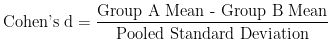

Cohen himself suggested the following interpretations for different values:
* 0.2 - small
* 0.5 - medium
* 0.8 - large

###### Test preparation course

In [40]:
course_yes = df[df['test preparation course'] == 'completed']['average score']
course_no = df[df['test preparation course'] == 'none']['average score']
mean_diff = course_yes.mean() - course_no.mean()

var_pooled = ((len(course_yes) - 1) * course_yes.var() +(len(course_no) - 1) * course_no.var() ) / (float(len(course_yes) + len(course_no) - 2))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size:", effect_size)

Effect size: 0.5534920945039076


###### Lunch

In [43]:
lunch_yes = df[df['lunch'] == 'standard']['average score']
lunch_no = df[df['lunch'] == 'free/reduced']['average score']
mean_diff = lunch_yes.mean() - lunch_no.mean()

var_pooled = ((len(lunch_yes) - 1) * lunch_yes.var() +(len(lunch_no) - 1) * lunch_no.var() ) / (float(len(lunch_yes) + len(lunch_no) - 2))
effect_size = mean_diff / np.sqrt(var_pooled)
print("Effect size:", effect_size)

Effect size: 0.6327751251564158


###### Gender

In [44]:
females = df[df['gender'] == 'female']['average score']
males = df[df['gender'] == 'male']['average score']
mean_diff = females.mean() - males.mean()

var_pooled = ((len(females) - 1) * females.var() +(len(males) - 1) * males.var() ) / (float(len(females) + len(males) - 2))
effect_size = mean_diff / np.sqrt(var_pooled)
print("Effect size:", effect_size)

Effect size: 0.2639127722748378


### Pearson Correlation
**The Pearson correlation coefficient** measures the strength of the linear relationship between two data sets


Previously we analyzed Writing Score and Math Score (scatterplot) and we saw correlation on the graph but now we can measure it

In [47]:
# calculate Pearson's correlation
corr, _ = stats.pearsonr(df['math score'], df['writing score'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.803


The evident positive correlation of 0.803 between the two variables is strong, as it surpasses the 0.5 threshold and approaches 1.0

#### Correlation Analysis
We can use visualization and we don't have to repeat the same test several times

<Axes: >

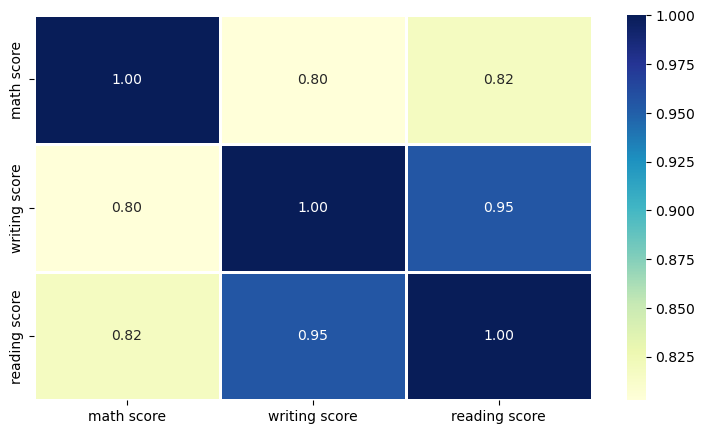

In [23]:
plt.figure(figsize= (9, 5))
sns.heatmap(df[['math score', 'writing score', 'reading score']].corr(),
            annot = True, 
            fmt = '.2f', # makes 0.80 instead of 0.8
            linewidths= 0.8,
            cmap="YlGnBu")

sns.Heatmap:
* annot = True: if True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data
* fmt - string formatting code to use when adding annotations

As we see all types of scores have strong correlation between each other


### Hypotheses:

#### Association between two variables (a catigorical variable and a quantative variable)

At first we should not confuse *two-sample* and *paired t test* because the're used in diffrent situations
<br>We actually need two-sample t test

##### Is the average score of a students who had luch is significantly different from the score for students without lunch

* H_0: The average score for a student who had lunch is equal to the score for a student who did not have
* H_1: The average score for a student who had lunch is NOT equal to the score for a student who did not have

In [48]:
lunch_yes = df[df['lunch'] == 'standard']['average score']
lunch_no = df[df['lunch'] == 'free/reduced']['average score']

tstat, pval = stats.ttest_ind(lunch_yes, lunch_no)

In [51]:
print('p-value for `score` two-sample t-test: ', pval)

p-value for `score` two-sample t-test:  7.737514585087955e-21


This is **much less than 0.05**, so we “reject the null hypothesis” and conclude that there is a significant difference in scores (**lunch does matter**)

##### Is the average score of males is significantly different from the score of females

* H_0: The average score of a male is equal to the score of a female
* H_1: The average score of a male is NOT equal to the score of a female

In [54]:
females = df[df['gender'] == 'female']['average score']
males = df[df['gender'] == 'male']['average score']

tstat, pval = stats.ttest_ind(females, males)

In [55]:
print('p-value for `score` two-sample t-test: ', pval)

p-value for `score` two-sample t-test:  3.3089910080540884e-05


Using a 0.05 significance threshold, we can reject the null hypothesis (p = 3.3089910080540884e-05)
<br>Rejected Null hypothesis doesn't tell a lot but we can certanly tell that it is unlikely that we got the results (the difference between score) by chance

#### Association between two variables categorical variables
**Chi-Square test** of independence is most commonly used to test association between **two** categorical variables

##### Course preparation test vs Result 

In [24]:
Xtab = pd.crosstab(df['result'], df['test preparation course'])
Xtab

test preparation course,completed,none
result,,
failed,60,225
passed,298,417


In [25]:
chi2, pval, dof, exp = stats.chi2_contingency(Xtab)
print(pval)

1.2915426312756866e-09


Using a 0.05 significance threshold, we can conclude that preparation (p = 8.955636917529706e-05) is significantly associated with result

##### Race and Ethnicity vs Result 

In [26]:
Xtab = pd.crosstab(df['result'], df['race/ethnicity'])
Xtab

race/ethnicity,group A,group B,group C,group D,group E
result,,,,,
failed,40,59,97,65,24
passed,49,131,222,197,116


In [27]:
chi2, pval, dof, exp = stats.chi2_contingency(Xtab)
print(pval)

9.605216200368108e-05


This is much less than our threshold (0.05) which signifies the association between these two variables

## Modeling
At first we should import all neccessary modules

In [103]:
# from sklearn.compose import make_column_transformer # it's just another way to convert categorical varaibles to numerical
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score


Actually, we can make RandomForestClassifier since we have the column "result" but we also can make RandomForestRegressor due to "average score" column
<br>Let's make the second one

### Data preprocessing

Since we're going to use Regressor we need to convert all categorical variables to numerical ones

At first we should use One-hot-encoding 

In [80]:
df = pd.get_dummies(df,
               columns = ['gender', 'lunch'],
               drop_first= True,
               dtype = np.int8)

We can change the type of the variable "race/ethnicity" to "categorical" and then use its cat codes as numeric values

In [82]:
df['race/ethnicity'] = pd.Categorical(df['race/ethnicity'], ['group A', 'group B', 'group C',  'group D', 'group E'])
df['race/ethnicity'] = df['race/ethnicity'].cat.codes

In [83]:
df.head()

,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,total score,average score,result,gender_male,lunch_standard
0,1,bachelor's degree,none,72,72,74,218,72.67,passed,0,1
1,2,some college,completed,69,90,88,247,82.33,passed,0,1
2,1,master's degree,none,90,95,93,278,92.67,passed,0,1
3,0,associate's degree,none,47,57,44,148,49.33,failed,1,0
4,2,some college,none,76,78,75,229,76.33,passed,1,1


We can do the same trick with "parental level of education"

In [84]:
df['parental level of education'] = pd.Categorical(df['parental level of education'],
                                                       ['high school', 'some high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"],
                                                       ordered= True)
df['parental level of education'] = df['parental level of education'].cat.codes

There is one column left and we can use padas function replace

In [86]:
df['test preparation course'] = df['test preparation course'].replace(['none', 'completed'], [0, 1])

In [87]:
df.head()

,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,total score,average score,result,gender_male,lunch_standard
0,1,4,0,72,72,74,218,72.67,passed,0,1
1,2,2,1,69,90,88,247,82.33,passed,0,1
2,1,5,0,90,95,93,278,92.67,passed,0,1
3,0,3,0,47,57,44,148,49.33,failed,1,0
4,2,2,0,76,78,75,229,76.33,passed,1,1


It looks like our data set is almost ready

#### Train test split
The rough standard for train-validation-test splits is 60-80% training data, 10-20% validation data, and 10-20% test data

In [88]:
X = df.drop(columns = ['math score', 'reading score', 'writing score', 'total score', 'average score', 'result'])
y = df['average score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

#### In search of best parameters

In [90]:
rfr = RandomForestRegressor(random_state = 42) # So we could get the same results again

In [91]:
# We choose which parameters should be tested
param_grid = {'n_estimators': [64, 100, 120],
              'max_features': [4, 8, 16],
              'min_samples_split': [2, 5, 10],
              'max_depth':[3,5,7]}

In [94]:
grid = GridSearchCV(rfr,
                    param_grid,
                    cv = 5,
                    scoring='neg_mean_squared_error',
                    return_train_score=True)

In SciKitLearn all scorer objects follow the convention that **higher return values are better than lower return values**. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as **neg_mean_squared_error** which return the negated value of the metric
(For example, we know that mse = 0.5 is better than mse = 6, but skl would choose mse = 6 so we just multiply them by -1 and it will choose mse = -0.5 rather thatn mse = -6)

In [95]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'max_features': [4, 8, 16],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [64, 100, 120]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [99]:
print(f'RMSE: {round(np.sqrt( - grid.best_score_), 2)}') # again we add minus sign because best score goes with -

RMSE: 12.61


In [97]:
grid.best_params_

{'max_depth': 3,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 120}

#### Building the Model

In [100]:
rfr_best = RandomForestRegressor(max_depth = 3,
                                 max_features = 4,
                                 min_samples_split = 2,
                                 n_estimators = 120,
                                 random_state=42)

In [101]:
rfr_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features=4, n_estimators=120,
                      random_state=42)

In [104]:
scores =  - cross_val_score(rfr_best, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
print(f"Mean: {np.sqrt(scores).mean()}")

Mean: 12.598194508967946


#### Predictions

In [106]:
y_pred = rfr_best.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared= False)
r_square = r2_score(y_test, y_pred)

In [107]:
print(f'Root Mean Squared error: {round(rmse, 3)}')
print(f'R-square: {round(r_square, 3)}')

Root Mean Squared error: 13.542
R-square: 0.145


In [ ]:
rfr_best.feature_importances_

## Conclusion
The model accuracy (judged by the r-squared and RMSE values) is not very high. But this was kind of expected as the features we have are not highly predictive of school/test performance. Test performance may depend on more features than we have in this dataset. Therefore, more features are required to accurately identify what affects students' test performance.

#### We can predict Math score by analysing Writing score, Reading score and other variables but this is not exactly what we wanted

But **why not**?
<br>At least you could see that it does a better job

In [108]:
df.head()

,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,total score,average score,result,gender_male,lunch_standard
0,1,4,0,72,72,74,218,72.67,passed,0,1
1,2,2,1,69,90,88,247,82.33,passed,0,1
2,1,5,0,90,95,93,278,92.67,passed,0,1
3,0,3,0,47,57,44,148,49.33,failed,1,0
4,2,2,0,76,78,75,229,76.33,passed,1,1


In [109]:
X = df.drop(columns = ['math score', 'total score', 'average score', 'result'])
y = df['math score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [111]:
rfr = RandomForestRegressor(random_state = 42)
param_grid = {'n_estimators': [64, 100, 120],
              'max_features': [4, 8, 16],
              'min_samples_split': [2, 5, 10],
              'max_depth':[3,5,7]}

In [112]:
grid = GridSearchCV(rfr,
                    param_grid,
                    cv = 5,
                    scoring='neg_mean_squared_error',
                    return_train_score=True)

In [113]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'max_features': [4, 8, 16],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [64, 100, 120]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [114]:
print(f'RMSE: {round(np.sqrt( - grid.best_score_), 2)}')

RMSE: 5.91


In [115]:
grid.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_split': 10,
 'n_estimators': 64}

#### Building the Model

In [116]:
rfr_best = RandomForestRegressor(max_depth = 7,
                                 max_features = 4,
                                 min_samples_split = 10,
                                 n_estimators = 64,
                                 random_state=42)

In [117]:
rfr_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=4, min_samples_split=10,
                      n_estimators=64, random_state=42)

In [118]:
scores =  - cross_val_score(rfr_best, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
print(f"Mean: {np.sqrt(scores).mean()}")

Mean: 5.910538013966868


#### Predictions

In [119]:
y_pred = rfr_best.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared= False)
r_square = r2_score(y_test, y_pred)

In [120]:
print(f'Root Mean Squared error: {round(rmse, 3)}')
print(f'R-square: {round(r_square, 3)}')

Root Mean Squared error: 5.942
R-square: 0.855


In [124]:
pd.DataFrame({'features': list(X_train), 'feature_imp': rfr_best.feature_importances_})

,features,feature_imp
0,race/ethnicity,0.020782
1,parental level of education,0.009207
2,test preparation course,0.006480
3,reading score,0.443951
4,writing score,0.363339
5,gender_male,0.123357
6,lunch_standard,0.032885


### Conclusion
As we see the result is much better but the goal was not the one we tried to achive